In [0]:
import cv2
cv2.__version__

'4.1.2'

In [0]:
import matplotlib.pyplot as plt

In [0]:
!pip install imutils 
import imutils

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
img = cv2.imread('gdrive/My Drive/Colab Notebooks/sudoku6.jpg')

In [0]:
img.shape

(571, 537, 3)

In [0]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(571, 537)

In [0]:
blurred = cv2.GaussianBlur(gray, (3,3),0)
blurred.shape

(571, 537)

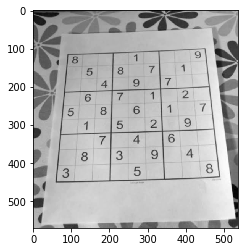

In [0]:
imgplot = plt.imshow(blurred, cmap='gray')


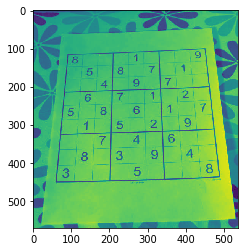

In [0]:
med = cv2.medianBlur(gray,1)
plt.imshow(med)

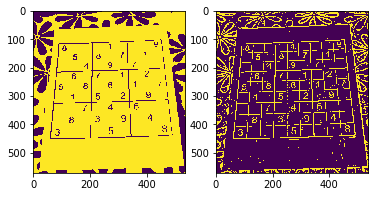

In [0]:
thresh = cv2.threshold(blurred, 140,255,cv2.THRESH_BINARY)[1]
plt.subplot(1,2,1)
plt.imshow(thresh)

thresh1 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2 )
plt.subplot(1,2,2)
plt.imshow(thresh1)

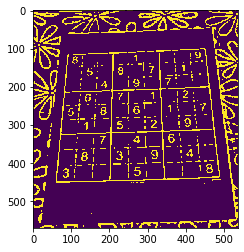

In [0]:
med = cv2.medianBlur(thresh1,5)
plt.imshow(med)

In [0]:
import numpy as np

In [0]:
kernel = np.ones((3,3))

erode = cv2.dilate(med,kernel,iterations=2)

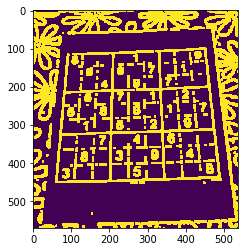

In [0]:
plt.imshow(erode)

In [0]:
thresh.shape

(571, 537)

In [0]:
cnts, heirarchy = cv2.findContours(med, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

In [0]:
hi = cv2.drawContours(img.copy(), cnts, -1, (0,255,0), 3)

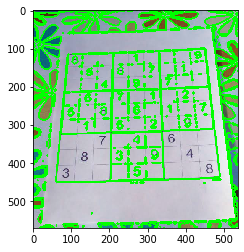

In [0]:
plt.imshow(hi)

In [0]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

cnt = cnts[0]

In [0]:
len(cnts)

302

In [0]:
hi2 = cv2.drawContours(img.copy(), cnt,0, (0,255,0), 50)

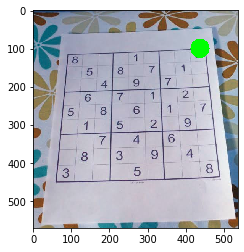

In [0]:
plt.imshow(hi2)

In [0]:
hi5 = cv2.drawContours(img.copy(), cnt,0, (255,255,0), 3)

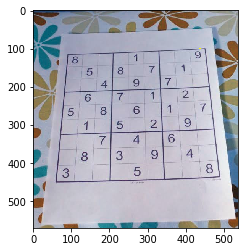

In [0]:
plt.imshow(hi5)

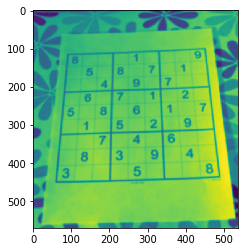

In [0]:
proc = cv2.GaussianBlur(gray.copy(),(9,9),0)
plt.imshow(proc)

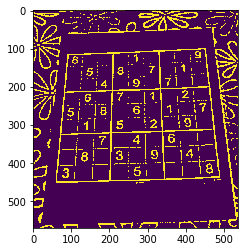

In [0]:
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 2)
plt.imshow(proc)

In [0]:
ext_contours, hier = cv2.findContours(proc.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [0]:
external_only = 0
external_only = cv2.drawContours(img.copy(), ext_contours, -1, (0, 255, 0), 1)

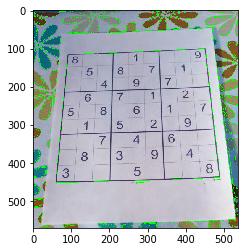

In [0]:
plt.imshow(external_only)

In [0]:
contoursss = sorted(ext_contours, key=cv2.contourArea, reverse=True)  # Sort by area, descending
polygon = contoursss[0]

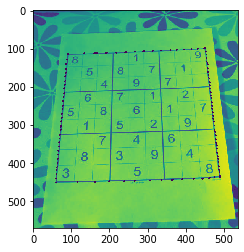

In [0]:
external_onlyyy = cv2.drawContours(img, polygon, -1, (0, 255, 0), 1)
plt.imshow(cv2.drawContours(gray, polygon, -1, (0, 255, 0), 3))

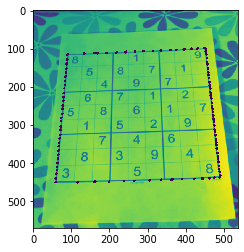

In [0]:
plt.imshow(cv2.drawContours(blurred.copy(), polygon, -1, (0, 255, 0), 5))

In [0]:
import operator

In [0]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in polygon]), key=operator.itemgetter(1))

In [0]:
polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]

(array([ 91, 114], dtype=int32),
 array([452, 101], dtype=int32),
 array([490, 437], dtype=int32),
 array([ 59, 451], dtype=int32))

In [0]:
polygon[top_right][0]

array([452, 101], dtype=int32)

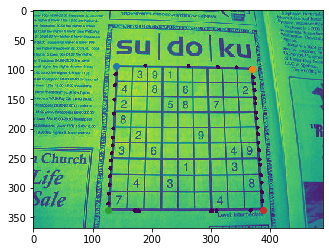

In [0]:
plt.scatter( polygon[top_left][0][0],polygon[top_left][0][1])
plt.scatter( polygon[top_right][0][0],polygon[top_right][0][1])
plt.scatter( polygon[bottom_left][0][0],polygon[bottom_left][0][1])
plt.scatter( polygon[bottom_right][0][0],polygon[bottom_right][0][1])
#, polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0] )
#plt.imshow(gray)
plt.imshow(cv2.drawContours(gray.copy(),polygon,-1,(0,0,255),5))

In [0]:
original_rect = np.array([polygon[top_left][0],polygon[top_right][0],polygon[bottom_right][0],polygon[bottom_left][0]],dtype='float32')

In [0]:
topleft,topright,bottomright,bottomleft = original_rect

In [0]:
def l2_dist(pt1,pt2):
  return np.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2)

In [0]:
maxlen = int(max(l2_dist(topleft,topright),l2_dist(topright,bottomright),l2_dist(bottomright,bottomleft),l2_dist(bottomleft,topright)))

In [0]:
maxlen

342

In [0]:
#target_rect = np.array([ [0,maxlen-1], [maxlen-1,maxlen-1], [0,maxlen-1],[0,0] ], dtype='float32')
target_rect = np.array([ [0,0], [maxlen,0] ,[maxlen,maxlen],[0,maxlen]] , dtype='float32')

In [0]:
M = cv2.getPerspectiveTransform(original_rect,target_rect)

In [0]:
warped = cv2.warpPerspective(blurred.copy(), M, (maxlen,maxlen) )

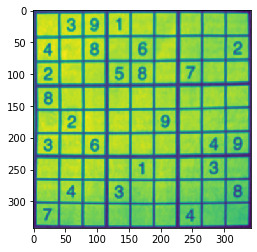

In [0]:
plt.imshow(warped)

In [0]:
maxlen

342

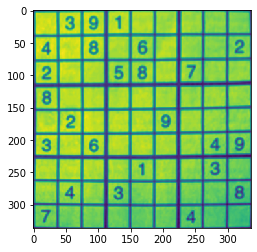

In [0]:
warped2 = warped[3:maxlen-3,3:maxlen-3]
plt.imshow(warped2)

In [0]:
!pip install pytesseract

In [0]:
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
import pytesseract

In [0]:
maxlen = warped2.shape[0]
maxlen

336

In [0]:
boxlen = int(maxlen/9)
boxlen

37

In [0]:
boxdims = [int(n) for n in np.linspace(0,maxlen,10)]
boxdims



[0, 37, 74, 112, 149, 186, 224, 261, 298, 336]

char
['9']
char
['3']
char
[]
char
['4']
char
['3']
char
['5']
char
['5']
char
['9']
char
['6']
char
[]
char
['4']
char
['3']
char
['7']
char
['6']
char
[]
char
['7']
char
['1']
char
['4']
char
[]
char
[]
char
['1']
char
[]
char
[]
char
[]
char
['7']
char
[]
char
['1']
char
[]


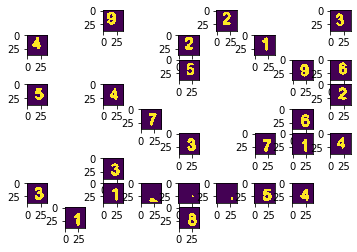

In [0]:
config = ("-l eng --oem 1 --psm 10")
#matrix = np.empty((9,9))
#row = np.empty((9,1))
matrix=[]
row=[]
kernelsize = int(maxlen/4)
if kernelsize%2==0:
  kernelsize+=1
for y in range(len(boxdims)-1):
  row=[]
  for x in range(len(boxdims)-1):
    x1 = boxdims[x]
    x2 = boxdims[x+1]
    y1 = boxdims[y]
    y2 = boxdims[y+1]
    
    roi = warped2[y1:y2, x1:x2]
    #print(x1,x2,y1,y2)
    roithresh = cv2.adaptiveThreshold(roi,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,kernelsize,2 )

    max_area=0
    seed_point = (int(0.5*boxlen), int(0.5*boxlen))
    #print(seed_point)
    for m in range(int(0.2*boxlen), int(0.8*boxlen)):
      for n in range(int(0.2*boxlen), int(0.8*boxlen)):
        #print(x,y)
        if roithresh[n, m] ==255:  
          area = cv2.floodFill(roithresh.copy(), None, (m, n), 150)
          if area[0] > max_area: 
            max_area = area[0]
            seed_point = (m+1, n+1)


    if roithresh[seed_point[1],seed_point[0]]==0:
      char=[]
    else:
      flood=0
      flood = cv2.floodFill(roithresh.copy(),None,seed_point,150)

      canvas=0
      canvas = roithresh.copy()
      for i in range(canvas.shape[0]):
        for j in range(canvas.shape[1]):
            if flood[1][i][j]==150:
              canvas[i][j]=255
            else:
              canvas[i][j]=0  
      plt.subplot(9,9,(y)*9+x)
      plt.imshow(canvas)
      text = pytesseract.image_to_string(canvas,config=config)
      char = [t for t in text if t.isdigit()]
      print("char")
      print(char)
    if char==[]:
      num=0
    else:
      num=int(char[0])
    #print(num)
    #np.append(row,num)
    row.append(num)
    #print(row.shape)
    #print(row)
  #np.append(matrix,row,axis=1)
  matrix.append(row)

In [0]:
roithresh[17][28]

0

In [0]:
matrix

[[0, 0, 0, 9, 0, 0, 3, 0, 0],
 [0, 4, 0, 0, 0, 3, 0, 5, 0],
 [0, 0, 0, 0, 0, 5, 0, 0, 9],
 [6, 0, 0, 4, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 7, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 7, 1],
 [4, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 7, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0]]

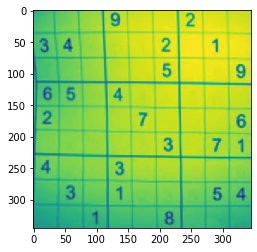

In [0]:
plt.imshow(warped2)

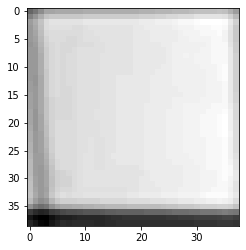

In [0]:
x1= boxdims[1]
x2 = boxdims[2]
y1 = boxdims[2]
y2 = boxdims[3]
roi1 = warped2[y1:y2,x1:x2]
plt.imshow(roi1,cmap='gray')

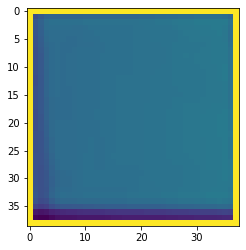

In [0]:
extcon, hiera = cv2.findContours(roi1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.drawContours(roi1.copy(),extcon,-1,(255,0,0),1))

In [0]:
conto = sorted(extcon, key=cv2.contourArea, reverse=True)  # Sort by area, descending
polygon11 = conto[0]

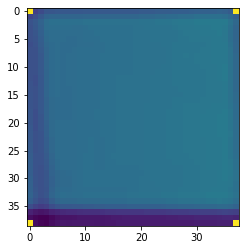

In [0]:
plt.imshow(cv2.drawContours(roi1.copy(),polygon11,-1,(255,0,0),1))

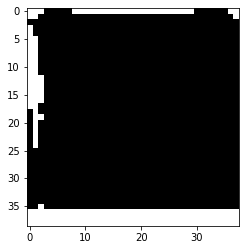

In [0]:
#roi1 = np.array(roi1,dtype='float32')
roithresh1 = cv2.adaptiveThreshold(roi1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,kernelsize,2 )
plt.imshow(roithresh1,cmap='gray')

In [0]:
roithresh1[43,43]

IndexError: ignored

In [0]:
config = ("-l eng --oem 1 --psm 10")
text1 = pytesseract.image_to_string(roithresh1.copy(),config=config)

In [0]:
text1

In [0]:
plt.imshow(roi1)

In [0]:
num1 = [te for te in text1 if te.isdigit()]

In [0]:
num1

In [0]:
boxlen

In [0]:
x1=y1=0
x2=y2=boxlen

In [0]:
roithresh1[43]

In [0]:
max_area=0
#print("hi")
seed_point = (int(x1+0.5*boxlen), int(x2-0.5*boxlen))
#print(seed_point)
for x in range(int(x1+0.2*boxlen), int(x2-0.2*boxlen)):
  for y in range(int(y1+0.2*boxlen), int(y2-0.2*boxlen)):
    # Only operate on light or white squares
    #print(x,y)
    if roithresh1[x,y] ==255:  # Note that .item() appears to take input as y, x
      area = cv2.floodFill(roithresh1.copy(), None, (x, y), 150)
      print(area)
      if area[0] > max_area:  # Gets the maximum bound area which should be the grid
        max_area = area[0]
        seed_point = (x, y)

IndexError: ignored

In [0]:
roithresh1[17]

In [0]:
seed_point

In [0]:
roithresh1[seed_point[0],seed_point[1]]

In [0]:
roithresh1[18]

array([  0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

In [0]:
mask = np.zeros((boxlen + 2, boxlen + 2), np.uint8)

In [0]:
g = cv2.floodFill(roithresh1.copy(),None,seed_point,150)
g

(1296, array([[255, 255, 255, ..., 150, 255, 255],
        [255, 255, 150, ..., 150, 150, 255],
        [150, 150, 150, ..., 150, 150, 150],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), None, (0,
  0,
  38,
  36))

In [0]:
roithresh1[18][28]


0

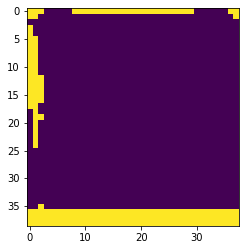

In [0]:
plt.imshow(g[1])

In [0]:
g[1][30]

array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
      dtype=uint8)

In [0]:
canvas=[[0,0],[0,0]]

canvas= []
for i in range(roithresh1.shape[0]):
  row=[]
  for j in range(roithresh1.shape[1]):
      if g[1][i][j]==150:
        row.append(200)
      else:
        row.append(0)

  canvas.append(row)

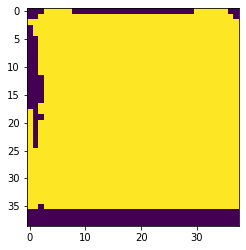

In [0]:
plt.imshow(canvas)

In [0]:
canvas[30]

[200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200,
 200]

In [0]:
text1 = pytesseract.image_to_string(canvas.copy(),config=config)

TypeError: ignored

In [0]:
text1

'1'

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
numbers_template = cv2.imread('gdrive/My Drive/Colab Notebooks/numbers.jpg',0)

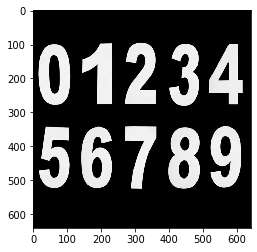

In [0]:
plt.imshow(numbers_template,cmap='gray')

In [0]:
numbers_template.shape

(640, 640)

In [0]:
import math

In [0]:
cnts, heirarchy = cv2.findContours(numbers_template, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

In [0]:
def getcontourorder(contour):
  loc = cv2.boundingRect(contour)
  return math.floor(loc[1]/20)*2000+loc[0]

In [0]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
cnts=cnts[:10]

In [0]:
cnts = sorted(cnts, key=lambda x:getcontourorder(x))


In [0]:
cnts[2]

array([[[312,  92]],

       [[312,  93]],

       [[311,  94]],

       ...,

       [[320,  94]],

       [[319,  93]],

       [[319,  92]]], dtype=int32)

In [0]:
cv2.boundingRect(cnts[2])

(264, 92, 104, 188)

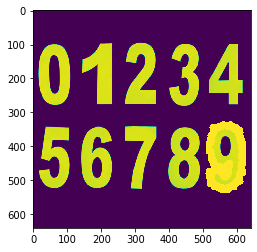

In [0]:
hu2 = cv2.drawContours(numbers_template.copy(), cnts[9],-1, (255,255,255), 20)
plt.imshow(hu2)

In [0]:
digits = {}

In [0]:
for (i,c) in enumerate(cnts):
  (x,y,w,h)=cv2.boundingRect(c)
  roi = numbers_template[y:y+h ,x:x+w]
  roi = cv2.resize(roi,(35,60))
  digits[i]=roi

In [0]:
digits[0].shape

(60, 35)

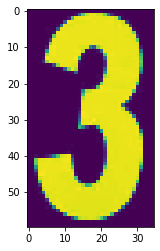

In [0]:
plt.imshow(digits[3])

1179
(18, 18)
0
0
161
(13, 24)
255
1
156
(13, 14)
255
1
82
(16, 13)
255
1
1182
(18, 18)
0
0
1167
(18, 18)
0
0
1162
(18, 18)
0
0
1175
(18, 18)
0
0
1169
(18, 18)
0
0
150
(14, 23)
255
1
1079
(18, 18)
0
0
181
(13, 16)
255
1
1120
(18, 18)
0
0
199
(13, 17)
255
1
1136
(18, 18)
0
0
1156
(18, 18)
0
0
1155
(18, 18)
0
0
151
(14, 13)
255
1
183
(14, 18)
255
1
1021
(18, 18)
0
0
1059
(18, 18)
0
0
159
(14, 20)
255
1
196
(13, 17)
255
1
1099
(18, 18)
0
0
105
(14, 12)
255
1
1145
(18, 18)
0
0
1145
(18, 18)
0
0
196
(15, 17)
255
1
961
(18, 18)
0
0
968
(18, 18)
0
0
1008
(18, 18)
0
0
1043
(18, 18)
0
0
1036
(18, 18)
0
0
1065
(18, 18)
0
0
1127
(18, 18)
0
0
1135
(18, 18)
0
0
955
(18, 18)
0
0
203
(14, 18)
255
1
976
(18, 18)
0
0
987
(18, 18)
0
0
1028
(18, 18)
0
0
179
(12, 17)
255
1
1062
(18, 18)
0
0
1121
(18, 18)
0
0
1151
(18, 18)
0
0
148
(15, 16)
255
1
983
(18, 18)
0
0
162
(13, 19)
255
1
1034
(18, 18)
0
0
1073
(18, 18)
0
0
1065
(18, 18)
0
0
1064
(18, 18)
0
0
131
(13, 22)
255
1
154
(14, 14)
255
1
1071
(18, 18)
0
0

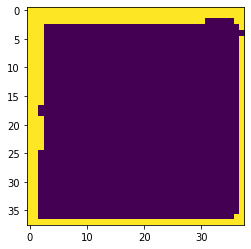

In [0]:
config = ("-l eng --oem 1 --psm 10")
#matrix = np.empty((9,9))
#row = np.empty((9,1))
matrix=[]
row=[]
kernelsize = int(maxlen/4)
if kernelsize%2==0:
  kernelsize+=1
for y in range(len(boxdims)-1):
  row=[]
  for x in range(len(boxdims)-1):
    x1 = boxdims[x]
    x2 = boxdims[x+1]
    y1 = boxdims[y]
    y2 = boxdims[y+1]
    
    roi = warped2[y1:y2, x1:x2]
    #print(x1,x2,y1,y2)
    roithresh = cv2.adaptiveThreshold(roi,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,kernelsize,2 )
    plt.imshow(roithresh)
    max_area=boxlen*boxlen*0.05
    seed_point = (int(0.5*boxlen), int(0.5*boxlen))
    #print(seed_point)
    flag=0
    for m in range(int(0.3*boxlen), int(0.7*boxlen)):
      for n in range(int(0.3*boxlen), int(0.7*boxlen)):
        #print(x,y)
        if roithresh[n, m] ==255:  
          area = cv2.floodFill(roithresh.copy(), None, (m, n), 150)
          if area[0] > max_area: 
            max_area = area[0]
            seed_point = (m, n)
            flag=1
    print(cv2.floodFill(roithresh.copy(), None, seed_point, 150)[0])
    print(seed_point)
    print(roithresh[seed_point[1],seed_point[0]])
    print(flag)
    if (roithresh[seed_point[1],seed_point[0]]==0) or flag==0:
      num=0
    else:
      flood=0
      flood = cv2.floodFill(roithresh.copy(),None,seed_point,150)

      canvas=0
      canvas = roithresh.copy()
      for i in range(canvas.shape[0]):
        for j in range(canvas.shape[1]):
            if flood[1][i][j]==150:
              canvas[i][j]=255
            else:
              canvas[i][j]=0  
      #plt.subplot(9,9,(y)*9+x)
      plt.imshow(canvas)
      contour=0
      contour = cv2.findContours(canvas,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
      #print(contour)
      contour=contour[0]
      #plt.imshow(cv2.drawContours(canvas.copy(),contour, -1, (255,255,255), 5))
      #print(contour)
      (box_x,box_y,box_w,box_h) =cv2.boundingRect(contour[0])

      isolated_digit = canvas[box_y:box_y+box_h ,box_x:box_x+box_w]
      #plt.imshow(isolated_digit)

      isolated_digit = cv2.resize(isolated_digit,(35,60))

      scores=[]
      for (digit,digit_template) in digits.items():
        result = cv2.matchTemplate(isolated_digit, digit_template,cv2.TM_CCOEFF)
        (_,score,_,_) = cv2.minMaxLoc(result)
        scores.append(score)

      #print(scores)
      num = np.argmax(scores)

      #text = pytesseract.image_to_string(canvas,config=config)
      #char = [t for t in text if t.isdigit()]
      #print("char")
      #print(char)
    #if char==[]:
    #  num=0
    #else:
    #  num=int(char[0])
    #print(num)
    #np.append(row,num)
    row.append(num)
    #print(row.shape)
    #print(row)
  #np.append(matrix,row,axis=1)
  matrix.append(row)

In [0]:
matrix

[[0, 3, 9, 1, 0, 0, 0, 0, 0],
 [4, 0, 8, 0, 6, 0, 0, 0, 2],
 [2, 0, 0, 5, 8, 0, 7, 0, 0],
 [8, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 0, 0, 9, 0, 0, 0],
 [3, 0, 6, 0, 0, 0, 0, 4, 9],
 [0, 0, 0, 0, 1, 0, 0, 3, 0],
 [0, 4, 0, 3, 0, 0, 0, 0, 8],
 [7, 0, 0, 0, 0, 0, 4, 0, 0]]

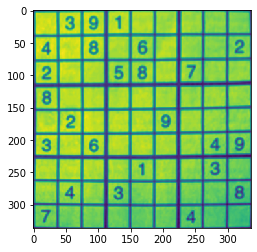

In [0]:
plt.imshow(warped2)